# Sprint 3 project: Data Visualization with Python

In this project exploratory data analysis is performed for this Kaggle dataset: Coursera Course Dataset. 
Available at: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset

In [1]:
%load_ext pycodestyle_magic

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore, shapiro, spearmanr
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from langid import classify
from nltk.tokenize import RegexpTokenizer
import string
from googletrans import Translator

In [3]:
df = pd.read_csv("coursera_data.csv", index_col=0, header=0)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134.0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743.0,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874.0,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413.0,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635.0,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 134.0 to nan
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.8+ KB


In [5]:
# Sorting according to index column
df = df.sort_index()
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0.0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1.0,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2.0,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3.0,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4.0,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


Dataset contains observations in other language and one observation with Not a Number (NaN) values. Also observations in capital letters. Text standardization is needed.

In [6]:
df.tail()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
887.0,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33k
888.0,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
889.0,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k
890.0,Compassionate Leadership Through Service Learn...,University of Colorado Boulder,COURSE,4.9,Beginner,6.4k
NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Evaluating features and observation
&#9758; There are 6 features in the dataset.
&#9758; There are 892 observations in the dataset.
&#9758; The amount of categorical columns is: 4. They are:
- course_title
- course_organization
- course_Certificate_type
- course_difficulty

&#9758; The amount of numerical columns is: 2. They are:
- course_rating
- course_students_enrolled

## Cleaning dataset
&#9745; NaN values observed = 6. They were removed from dataset.
&#9745; No duplicates
After cleaning dataset again checked to assess the cleaning results.

In [7]:
# Checking if dataset has any NaN values or duplicates
duplicates = df.duplicated().any().sum()
nulls = df.isnull().any().sum()
nans = df.isna().any().sum()
print(f"Amount of duplicates found: {duplicates}.")
print(f"Amount of null values found: {nulls}.")
print(f"Amount of NaN values found: {nans}.")

Amount of duplicates found: 0.
Amount of null values found: 6.
Amount of NaN values found: 6.


In [8]:
# Removing observation that consists of features that values are NaN.
df = df.dropna()
df.tail()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886.0,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11k
887.0,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33k
888.0,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
889.0,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k
890.0,Compassionate Leadership Through Service Learn...,University of Colorado Boulder,COURSE,4.9,Beginner,6.4k


In [9]:
# Checking for duplicates, NaN values after cleaning
duplicates = df.duplicated().any().sum()
nulls = df.isnull().any().sum()
nans = df.isna().any().sum()
print(f"Amount of duplicates found after cleaning: {duplicates}.")
print(f"Amount of null values found after cleaning: {nulls}.")
print(f"Amount of NaN values found after cleaning: {nans}.")

Amount of duplicates found after cleaning: 0.
Amount of null values found after cleaning: 0.
Amount of NaN values found after cleaning: 0.


### Index values changed to integers
Index values are floats. But floating point values as indexes are not necessary for dataset. Therefore, index value type will be changed to the integer type.

In [10]:
df.index = df.index.astype("int")
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
      dtype='int64', length=891)

### Language corrections
Dataset contains observations with features in Russian. Therefore, dataset is checked for other languages. To standardize the dataset course_title feature was translated to English. Libraries used for this work:
- langid
- googletrans

In [11]:
# Using langid library to classify dataset languages
def detect_language(text):
    try:
        lang, confidence = classify(text)
        return lang
    except:
        return "unkown"

In [12]:
# New column in that will describe the language of the course_title
df["language"] = df["course_title"].apply(detect_language)
df[["course_title", "language"]].head()

,course_title,language
0,IBM Data Science,en
1,Introduction to Data Science,en
2,The Science of Well-Being,en
3,Python for Everybody,en
4,Google IT Support,en


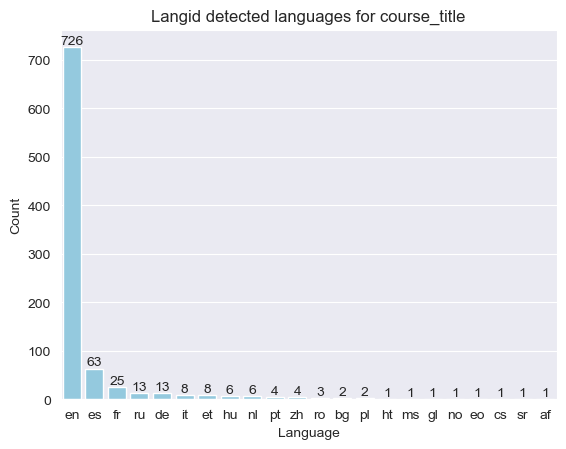

In [13]:
# Plotting barplot to check what languages were detected
language_count = df[["language"]].groupby(["language"]).value_counts()

# Sorted the values
language_count = language_count.sort_values(ascending=False)
sns.barplot(data=language_count, color="skyblue")
plt.title("Langid detected languages for course_title")
plt.xlabel("Language")
plt.ylabel("Count")

# Adding labels to have more informative graphs
for i, v in enumerate(language_count.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.show()

Langid identified a few languages in the course_title feature.

In [14]:
print(
    f"Number of languages identified by langid:"
    f" "
    f"{len(language_count)}"
)
dominating_language_row = language_count.loc[
    language_count == language_count.max()
]

print("Dominating language is:")
dominating_language_row

Number of languages identified by langid: 22
Dominating language is:


language
en    726
Name: count, dtype: int64

In [15]:
non_english_observations = df.loc[df.language != "en"]
list_of_non_english = non_english_observations.language.unique()
print(list_of_non_english)

['fr' 'es' 'nl' 'it' 'et' 'de' 'pl' 'ru' 'hu' 'bg' 'ms' 'cs' 'ht' 'ro'
 'pt' 'no' 'zh' 'eo' 'af' 'gl' 'sr']


In [16]:
# Function for translation
def translate(text, target_language="en"):
    translator = Translator()
    try:
        translation = translator.translate(text, dest=target_language)
        return translation.text
    except Exception as e:
        print(f"Error translating '{text}': {e}")
        return None

In [17]:
df["course_title_translated"] = df.loc[
    df.language != "en"
].course_title.apply(translate)

In [18]:
after_translation = df.loc[df.language != "en"]
after_translation[
    ["course_title", "language", "course_title_translated"]
].sort_values(by="language").head()

,course_title,language,course_title_translated
777,Cloud Computing Basics (Cloud 101),af,Cloud Computing Basics (Cloud 101)
236,Программирование на Python,bg,Programming on Python
846,Agile и Scrum в работе над проектами и продуктами,bg,Agile and Scrum in work on projects and products
365,Innovation Management,cs,Innovation Management
504,Spanish Vocabulary: Meeting People,de,Spanish Vocabulary: Meeting People


In [19]:
english_observations = df.loc[df.language == "en"]
english_observations[
    ["course_title", "language", "course_title_translated"]
].sort_values(by="language").head()

,course_title,language,course_title_translated
0,IBM Data Science,en,NaN
574,Social Policy for Social Services & Health Pra...,en,NaN
575,Mastering Final Cut Pro,en,NaN
576,The Oral Cavity: Portal to Health and Disease,en,NaN
577,Leadership in 21st Century Organizations,en,NaN


In [20]:
# Filling NaN values in the column with the course_title values
df["course_title_translated"] = df["course_title_translated"].fillna(
    df["course_title"]
)
df[["course_title", "course_title_translated"]].head()

,course_title,course_title_translated
0,IBM Data Science,IBM Data Science
1,Introduction to Data Science,Introduction to Data Science
2,The Science of Well-Being,The Science of Well-Being
3,Python for Everybody,Python for Everybody
4,Google IT Support,Google IT Support


### Standardizing text input
&#9745; Dataset contains capital letters. These are removed.
&#9745; Dataset is preprocessed to remove the trailing white space and consecutive whitespace in text. 
&#9745; Text contains various symbols, that are removed.

In [21]:
# Lowering letters, removing whitespaces
categorical_columns = df.select_dtypes(include="object").columns

for column in categorical_columns:
    df[column] = df[column].str.lower()
    df[column] = df[column].str.strip()
    df[column] = df[column].replace(r"\s{2,}", " ", regex=True)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language,course_title_translated
0,ibm data science,ibm,professional certificate,4.6,beginner,480k,en,ibm data science
1,introduction to data science,ibm,specialization,4.6,beginner,310k,en,introduction to data science
2,the science of well-being,yale university,course,4.9,mixed,2.5m,en,the science of well-being
3,python for everybody,university of michigan,specialization,4.8,beginner,1.5m,en,python for everybody
4,google it support,google,professional certificate,4.8,beginner,350k,en,google it support


In [22]:
# Identifying punctuation and special symbols in the course_title feature
df["contains_punctuation_title"] = df[
    "course_title_translated"
].str.contains("[{}]".format(string.punctuation), "")

rows_with_punctuation = df.loc[df.contains_punctuation_title == True]
rows_with_punctuation[
    ["course_title_translated", "contains_punctuation_title"]
].head()

,course_title_translated,contains_punctuation_title
2,the science of well-being,True
15,data science: foundations using r,True
16,finance & quantitative modeling for analysts,True
21,covid-19 contact tracing,True
24,"data engineering, big data, and machine learni...",True


In [23]:
# Identifying punctuation and special symbols in the course_organization
df["contains_punctuation_org"] = df[
    "course_organization"
].str.contains("[{}]".format(string.punctuation), "")

rows_with_punctuation = df.loc[df.contains_punctuation_org == True]
rows_with_punctuation[
    ["course_organization", "contains_punctuation_org"]
].head()

,course_organization,contains_punctuation_org
5,deeplearning.ai,True
27,deeplearning.ai,True
28,university of illinois at urbana-champaign,True
30,"university of california, irvine",True
31,"university of california, irvine",True


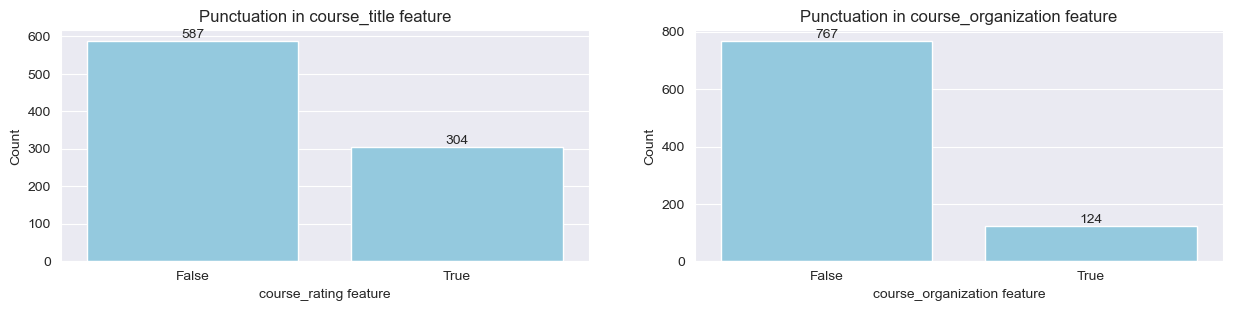

In [24]:
# Special symbols and punctuation in course_title
punct_count_title = (
    df[["contains_punctuation_title"]]
    .groupby(["contains_punctuation_title"])
    .value_counts()
)
punct_count_organization = (
    df[["contains_punctuation_org"]]
    .groupby(["contains_punctuation_org"])
    .value_counts()
)

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.barplot(data=punct_count_title, ax=ax[0], color="skyblue")
sns.barplot(data=punct_count_organization, ax=ax[1], color="skyblue")
ax[0].set_title("Punctuation in course_title feature")
ax[1].set_title("Punctuation in course_organization feature")
ax[0].set_xlabel("course_rating feature")
ax[1].set_xlabel("course_organization feature")
ax[0].set_ylabel("Count")
ax[1].set_ylabel("Count")

# Adding labels to have more informative graphs
for i, v in enumerate(punct_count_title.values):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(punct_count_organization.values):
    ax[1].text(i, v, str(v), ha="center", va="bottom")

plt.show()

In [25]:
# Function to remove punctuation
def remove_punctuation(dataframe):
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(dataframe)
    text_without_punctuation = " ".join(tokens)
    return text_without_punctuation

In [26]:
# Removing punctuation
df["course_title_clean"] = df["course_title_translated"].apply(
    remove_punctuation
)
df["course_org_clean"] = df["course_organization"].apply(
    remove_punctuation
)

In [27]:
# Checking if punctuation, symbols are removed
punctuation_rows = df.loc[df.contains_punctuation_title == True]
punctuation_rows[
    ["course_title", "course_title_translated", "course_title_clean"]
].head()

,course_title,course_title_translated,course_title_clean
2,the science of well-being,the science of well-being,the science of well being
15,data science: foundations using r,data science: foundations using r,data science foundations using r
16,finance & quantitative modeling for analysts,finance & quantitative modeling for analysts,finance quantitative modeling for analysts
21,covid-19 contact tracing,covid-19 contact tracing,covid 19 contact tracing
24,"data engineering, big data, and machine learni...","data engineering, big data, and machine learni...",data engineering big data and machine learning...


In [28]:
punctuation_rows[
    ["course_title", "course_title_translated", "course_title_clean"]
].tail()

,course_title,course_title_translated,course_title_clean
879,introduction to chemistry: reactions and ratios,introduction to chemistry: reactions and ratios,introduction to chemistry reactions and ratios
883,психолингвистика (psycholinguistics),psycholinguistics.,psycholinguistics
885,autodesk cad/cam for manufacturing,autodesk cad/cam for manufacturing,autodesk cad cam for manufacturing
887,object-oriented design,object-oriented design,object oriented design
890,compassionate leadership through service learn...,compassionate leadership through service learn...,compassionate leadership through service learn...


In [29]:
# Checking if punctuation and symbols are removed
punctuation_rows = df.loc[df.contains_punctuation_org == True]
punctuation_rows[["course_organization", "course_org_clean"]].head()

,course_organization,course_org_clean
5,deeplearning.ai,deeplearning ai
27,deeplearning.ai,deeplearning ai
28,university of illinois at urbana-champaign,university of illinois at urbana champaign
30,"university of california, irvine",university of california irvine
31,"university of california, irvine",university of california irvine


In [30]:
punctuation_rows[["course_organization", "course_org_clean"]].tail()

,course_organization,course_org_clean
836,"university of california, davis",university of california davis
840,"university of california, davis",university of california davis
841,e-learning development fund,e learning development fund
852,university of illinois at urbana-champaign,university of illinois at urbana champaign
856,(isc)²,isc ²


In [31]:
# Adding underscore instead of spaces to improve readability
df["course_title_clean"] = df["course_title_clean"].str.replace(
    r"\s+", "_", regex=True
)
df["course_org_clean"] = df["course_org_clean"].str.replace(
    r"\s+", "_", regex=True
)

In [32]:
# Checking if replacing space with underscore was successful
df[
    [
        "course_title",
        "course_title_translated",
        "course_title_clean",
        "course_organization",
        "course_org_clean",
    ]
].head()

,course_title,course_title_translated,course_title_clean,course_organization,course_org_clean
0,ibm data science,ibm data science,ibm_data_science,ibm,ibm
1,introduction to data science,introduction to data science,introduction_to_data_science,ibm,ibm
2,the science of well-being,the science of well-being,the_science_of_well_being,yale university,yale_university
3,python for everybody,python for everybody,python_for_everybody,university of michigan,university_of_michigan
4,google it support,google it support,google_it_support,google,google


In [33]:
df[
    [
        "course_title",
        "course_title_translated",
        "course_title_clean",
        "course_organization",
        "course_org_clean",
    ]
].tail()

,course_title,course_title_translated,course_title_clean,course_organization,course_org_clean
886,understanding modern finance,understanding modern finance,understanding_modern_finance,american institute of business and economics,american_institute_of_business_and_economics
887,object-oriented design,object-oriented design,object_oriented_design,university of alberta,university_of_alberta
888,aprende a programar con python,learn to program with python,learn_to_program_with_python,universidad austral,universidad_austral
889,погружение в python,immersion in python,immersion_in_python,moscow institute of physics and technology,moscow_institute_of_physics_and_technology
890,compassionate leadership through service learn...,compassionate leadership through service learn...,compassionate_leadership_through_service_learn...,university of colorado boulder,university_of_colorado_boulder


In [34]:
# Dropping unnecessary columns after analysis
df = df.drop(["course_title_translated"], axis=1)

### Checking for translation and standardisation errors
Dataset feature course_title, was translated modified. During checking for errors, it was identified that course_title_clean has some duplicates. These values were corrected manually, to avoid duplication, that could lead to incorrect calculations or interpretation.

In [35]:
# Checking for translation and transformation errors
df["duplicated_course_titles"] = df.duplicated(
    subset=["course_title_clean"], keep=False
)
duplicated_observations = df[df["duplicated_course_titles"] == True]
duplicated_observations

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language,contains_punctuation_title,contains_punctuation_org,course_title_clean,course_org_clean,duplicated_course_titles
6,machine learning,stanford university,course,4.9,mixed,3.2m,fr,False,False,machine_learning,stanford_university,True
181,machine learning,university of washington,specialization,4.6,intermediate,290k,fr,False,False,machine_learning,university_of_washington,True
205,developing your musicianship,berklee college of music,specialization,4.8,beginner,54k,es,False,False,developing_your_musicianship,berklee_college_of_music,True
241,marketing digital,universidade de são paulo,course,4.8,beginner,81k,en,False,False,marketing_digital,universidade_de_são_paulo,True
325,marketing digital,universidad austral,specialization,4.7,beginner,39k,en,False,False,marketing_digital,universidad_austral,True
756,developing your musicianship,berklee college of music,course,4.8,mixed,41k,es,False,False,developing_your_musicianship,berklee_college_of_music,True


In [36]:
df.loc[6, "course_title_clean"] = "machine_learning_stanford"
df.loc[181, "course_title_clean"] = "machine_learning_washington"
df.loc[205, "course_title_clean"] = (
    "developing_your_musicianship_specializ"
)
df.loc[756, "course_title_clean"] = (
    "developing_your_musicianship_course"
)
df.loc[241, "course_title_clean"] = "marketing_digital_sãopaulo"
df.loc[325, "course_title_clean"] = "marketing_digital_austral"

### Checking if there are any other issues
Checking if each feature is typed consistently without any trailing whitespace or typing errors.

&#9745; course_students_enrolled transformed to numeric values. 
- Since data type course_students_enrolled is an object and contains 'k' abbreviation for 1000 and 'm' abbreviation for 1000000, this feature could be corrected for more convenient and computationally convenient format.

&#9745; course_rating feature is without inconsistencies.
&#9745; course_Certificate_type feature is without inconsistencies. 
- Spaces between words changed to underscore, to maintain consistent style

&#9745; course_difficulty feature is without inconsistencies.
&#9745; course_org_clean feature is without inconsistencies.
- 'isc_² changed to 'isc' in course_org_clean
- 'isc_²_systems_security_certified_practitioner_sscp' changed to 'systems_security_certified_practitioner_sscp'

In [37]:
df["course_students_enrolled"].head()

0    480k
1    310k
2    2.5m
3    1.5m
4    350k
Name: course_students_enrolled, dtype: object

In [38]:
# Converting course_students_enrolled to numeric format
df["course_students_enrolled"] = (
    df["course_students_enrolled"]
    .replace({"k": "*1e3", "m": "*1e6"}, regex=True)
    .map(pd.eval)
)
df["course_students_enrolled"] = df[
    "course_students_enrolled"
].astype(int)
df["course_students_enrolled"].dtype

dtype('int64')

In [39]:
df["course_students_enrolled"].head()

0     480000
1     310000
2    2500000
3    1500000
4     350000
Name: course_students_enrolled, dtype: int64

In [40]:
# Checking course_rating for inconsistencies
df.course_rating.unique()

array([4.6, 4.9, 4.8, 4.7, 4.5, 4.4, 3.9, 4.3, 4.2, 3.7, 5. , 4.1, 4. ,
       3.3])

In [41]:
# Checking course_Certificate_type for inconsistencies
df.course_Certificate_type.unique()

array(['professional certificate', 'specialization', 'course'],
      dtype=object)

In [42]:
df["course_Certificate_type"] = df[
    "course_Certificate_type"
].str.replace(r"\s+", "_", regex=True)
df.course_Certificate_type.unique()

array(['professional_certificate', 'specialization', 'course'],
      dtype=object)

In [43]:
# Checking course_difficulty for inconsistencies
df.course_difficulty.unique()

array(['beginner', 'mixed', 'intermediate', 'advanced'], dtype=object)

In [44]:
# Checking course_org_clean for inconsistencies
df.course_org_clean.unique();

In [45]:
# Checking the organisation ISC_² name and related courses
df.loc[df["course_org_clean"] == "isc_²"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language,contains_punctuation_title,contains_punctuation_org,course_title_clean,course_org_clean,duplicated_course_titles
134,(isc)² systems security certified practitioner...,(isc)²,specialization,4.7,beginner,5300,en,True,True,isc_²_systems_security_certified_practitioner_...,isc_²,False
612,access controls,(isc)²,course,4.6,beginner,2900,en,False,True,access_controls,isc_²,False
856,"identifying, monitoring, and analyzing risk an...",(isc)²,course,4.9,beginner,1700,en,True,True,identifying_monitoring_and_analyzing_risk_and_...,isc_²,False


In [46]:
# Fixing course_title (ISC)² Systems Security Certified Practitioner (SSCP)
df["course_title_clean"].replace(
    "isc_²_systems_security_certified_practitioner_sscp",
    "systems_security_certified_practitioner_sscp",
    inplace=True,
)
df[["course_title", "course_title_clean"]].loc[
    df["course_org_clean"] == "isc_²"
]

,course_title,course_title_clean
134,(isc)² systems security certified practitioner...,systems_security_certified_practitioner_sscp
612,access controls,access_controls
856,"identifying, monitoring, and analyzing risk an...",identifying_monitoring_and_analyzing_risk_and_...


In [47]:
# Fixing course_org_clean 'isc_²' entries to 'isc'
df["course_org_clean"].replace("isc_²", "isc", inplace=True)
df.course_org_clean.loc[df["course_org_clean"] == "isc_²"]

Series([], Name: course_org_clean, dtype: object)

In [48]:
df.course_org_clean.loc[df["course_org_clean"] == "isc"]

134    isc
612    isc
856    isc
Name: course_org_clean, dtype: object

### Identifying the outliers
The outliers of the data should be analyzed and identified to understand if there are any incorrect values, typing errors, and other issues. To analyze the outliers 3 techniques are be used:
- Inter quartile range
- Z-score
- DBSCAN
- IsolationForest

The outliers are analyzed for:
- course_students_enrolled
- course_rating

course_students_enrolled analysis:
- Mean for the course_rating: 4.677.
- Median for the course_rating: 4.7.
- Mean and the median are the same. It shows symmetric data distribution.
- Outliers identified by a IsolationForest, z-score, and IQR methods overlap.
- DBSCAN does not identify any outliers.
- No outliers are removed from the dataset.

course_students_enrolled analysis:
- Mean for the course_students_enrolled: 90552.076.
- Median for the course_students_enrolled: 42000.0.
- Mean is 2 times higher than median. Could be that some higher values increase the mean.
- Different outliers identified by each algorithm: outliers identified by DBSCAN and IsolationForest do not overlap.
- Outliers that are identified by all the methods are with indexes: 2, 3, 5, 6, 13, 15, 40, 44, 47, 175.
- After analysis these values are not removed and evaluated as features of dataset that has higher variability.

The course_rating statistics:
Normal distribution intervals for the course_rating: -0.487 to 0.487.
IQR intervals for the course_rating: 4.3 to 5.1.
Mean for the course_rating: 4.677.
Median for the course_rating: 4.7.
Merged outlier for the course_rating:
No outliers found.

The course_students_enrolled statistics:
Normal distribution intervals for the course_students_enrolled: -545809.362 to 545809.362.
IQR intervals for the course_students_enrolled: -105500.0 to 222500.0.
Mean for the course_students_enrolled: 90552.076.
Median for the course_students_enrolled: 42000.0.
Merged outlier for the course_students_enrolled:
Outliers identified commonly: Index([2, 3, 5, 6, 13, 15, 40, 44, 47, 175], dtype='int64')


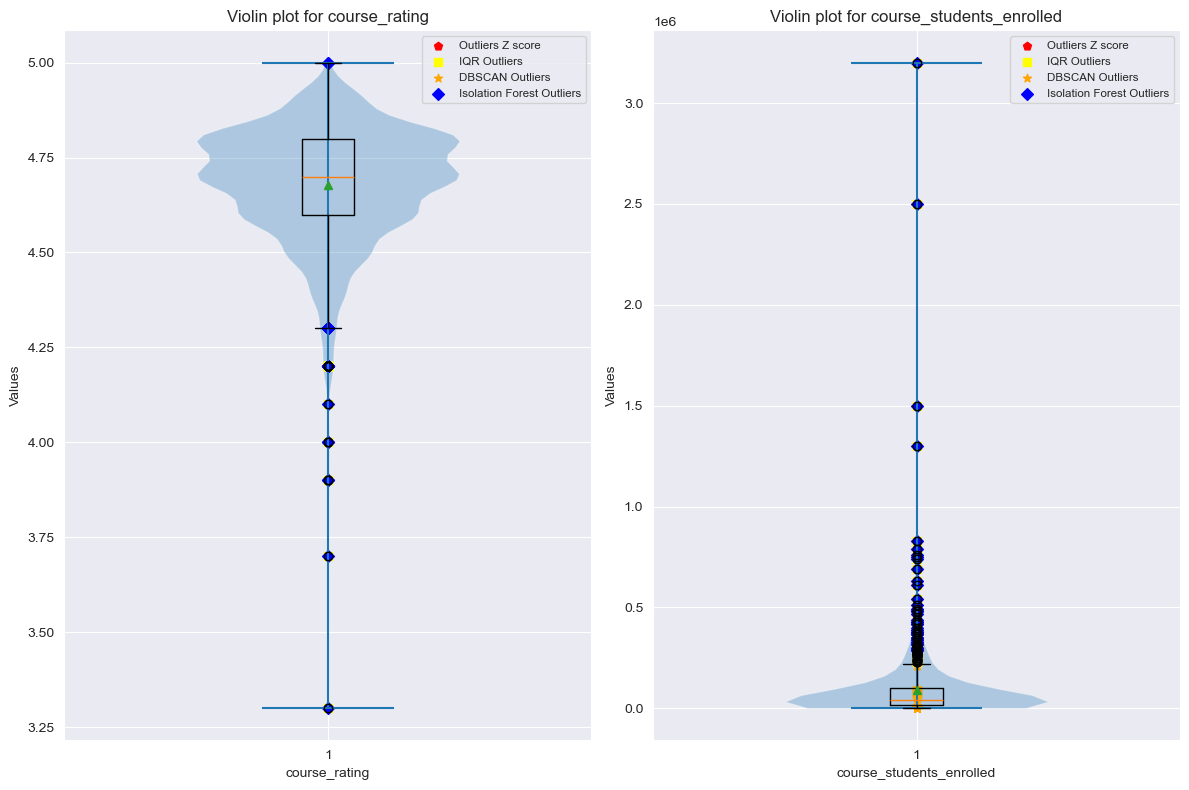

In [49]:
# Plotting outliers according to IQR and Z-score
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
numerics = [
    "int16",
    "int32",
    "int64",
    "float16",
    "float32",
    "float64",
]
numerical_columns = df.select_dtypes(include=numerics)
threshold = 3  # Standard deviations:3
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Calculating outliers according to Z-score
    z_score_column = zscore(df[column])
    out_z_score = (z_score_column > threshold) | (
        z_score_column < -threshold
    )
    out_values_z_score = df.loc[out_z_score, column]

    # Reshaping the pandas dataframe column for IsolationForest and DBSCAN
    reshaped = df[column].values.reshape(-1, 1)

    # Calculating outliers according to DBSCAN
    dbscan = DBSCAN(eps=1.0, min_samples=5)
    outliers_dbscan = dbscan.fit_predict(reshaped) == -1
    outliers_values_dbscan = df.loc[outliers_dbscan, column]

    # Calculating outliers according to IsolationForest
    isolation_forest = IsolationForest(contamination=0.05)
    outliers_isolation_forest = (
        isolation_forest.fit_predict(reshaped) == -1
    )
    outliers_values_isolationforest = df.loc[
        outliers_isolation_forest, column
    ]

    # Calculating outliers according to IQR
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    q_minimum = df[column].quantile(0.25) - 1.5 * iqr
    q_maximum = df[column].quantile(0.75) + 1.5 * iqr
    outliers_iqr = (df[column] < q_minimum) | (df[column] > q_maximum)
    outliers_values_iqr = df.loc[outliers_iqr, column]

    # Identifying common outliers identified by all algorithms
    outlier_merged = pd.merge(
        outliers_values_dbscan,
        outliers_values_iqr,
        left_index=True,
        right_index=True,
        how="inner",
    )
    outlier_merged = pd.merge(
        outlier_merged,
        outliers_values_isolationforest,
        left_index=True,
        right_index=True,
        how="inner",
    )
    outlier_merged = pd.merge(
        outlier_merged,
        out_values_z_score,
        left_index=True,
        right_index=True,
        how="inner",
        suffixes=("_df1", "_df2"),
    )
    observation_identifiers = outlier_merged.index

    # Calculating mean, SD and median
    mean_value = round(df[column].mean(), 3)
    sd_values_3 = round(df[column].std() * 3, 3)
    median_value = round(df[column].median(), 3)

    # Subplot parameters
    axes[i].violinplot(df[column])
    axes[i].set_title(f"Violin plot for {column}")
    axes[i].boxplot(df[column], widths=0.1, showmeans=True)
    axes[i].set_xlabel(f"{column}")
    axes[i].set_ylabel("Values")
    axes[i].set_color = "skyblue"

    # Z-score outliers
    axes[i].scatter(
        [1] * out_z_score.sum(),
        df[column][out_z_score],
        color="red",
        marker="p",
        label="Outliers Z score",
    )

    # IQR outliers
    axes[i].scatter(
        [1] * outliers_iqr.sum(),
        df[column][outliers_iqr],
        color="yellow",
        marker="s",
        label="IQR Outliers",
    )

    # DBSCAN outliers
    axes[i].scatter(
        [1] * outliers_dbscan.sum(),
        df[column][outliers_dbscan],
        color="orange",
        marker="*",
        label="DBSCAN Outliers",
    )

    # Isolation Forest outliers
    axes[i].scatter(
        [1] * outliers_isolation_forest.sum(),
        df[column][outliers_isolation_forest],
        color="blue",
        marker="D",
        label="Isolation Forest Outliers",
    )

    # Report output parameters
    z_criteria = df.loc[out_z_score, column].empty
    iqr_criteria = df.loc[outliers_iqr, column].empty
    if not z_criteria or not iqr_criteria:
        axes[i].legend(loc="best", fontsize="small")
        print("\033[92m" + f"The {column} statistics:" + "\033[0m")
        print(
            f"Normal distribution intervals for the {column}: "
            f"{-sd_values_3} to {sd_values_3}."
        )
        print(
            f"IQR intervals for the {column}: "
            f"{round(q_minimum,3)} to {round(q_maximum,3)}."
        )
        print(f"Mean for the {column}: {mean_value}.")
        print(f"Median for the {column}: {median_value}.")
        # print("\033[4m" + f"Z-score outlier for the {column}:" + "\033[0m")
        # if out_values_z_score.empty:
        #     print("No outliers found.")
        # else:
        #     print(out_values_z_score)
        # print("\033[4m" + f"IQR outlier for the {column}:" + "\033[0m")
        # if outliers_values_iqr.empty:
        #     print("No outliers found.")
        # else:
        #     print(outliers_values_iqr)
        # print("\033[4m" + f"DBSCAN outlier for the {column}:" + "\033[0m")
        # if outliers_values_dbscan.empty:
        #     print("No outliers found.")
        # else:
        #     print(outliers_values_dbscan)
        # print("\033[4m" + f"IsolationForest outlier for {column}:" + "\033[0m")
        # if outliers_values_isolationforest.empty:
        #     print("No outliers found.")
        # else:
        #     print(outliers_values_isolationforest);
        print(
            "\033[4m"
            + f"Merged outlier for the {column}:"
            + "\033[0m"
        )
        if outlier_merged.empty:
            print("No outliers found.")
        else:
            print(
                f"Outliers identified commonly: {observation_identifiers}"
            )
            # print(outlier_merged)
        print("=" * 30 + "\n")  # Separator for clarity

plt.tight_layout()
plt.show()

## Evaluating features and observation after cleaning dataset
&#9758; There are 11 features in the dataset.
&#9758; There are 891 observations in the dataset.
&#9758; The amount of categorical columns is: 9. They are:
- course_title
- course_organization
- course_Certificate_type
- course_difficulty
- contains_punctuation_title (new)
- contains_punctuation_org (new)
- language (new)
- course_title_clean (new)
- course_org_clean (new)

&#9758; The amount of numerical columns is: 2. They are:
- course_rating
- course_students_enrolled

In [50]:
df.shape

(891, 12)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_title                891 non-null    object 
 1   course_organization         891 non-null    object 
 2   course_Certificate_type     891 non-null    object 
 3   course_rating               891 non-null    float64
 4   course_difficulty           891 non-null    object 
 5   course_students_enrolled    891 non-null    int64  
 6   language                    891 non-null    object 
 7   contains_punctuation_title  891 non-null    bool   
 8   contains_punctuation_org    891 non-null    bool   
 9   course_title_clean          891 non-null    object 
 10  course_org_clean            891 non-null    object 
 11  duplicated_course_titles    891 non-null    bool   
dtypes: bool(3), float64(1), int64(1), object(7)
memory usage: 104.5+ KB


## Numeric features analysis
Numeric features are analyzed using these methods:
- Histograms
- Normalization (Box-Cox)
- Shapiro and Anderson tests.


Results:
- Anderson test shows that neither course_rating nor course_students_enrolled is normally distributed.
- Shapiro test shows that neither course_rating nor course_students_enrolled does not have normal distribution.
- Histogram of course_rating looks like bimodal distribution, after Box-Cox normalization dataset distribution looks even more like bimodal.
- Histogram of course_students_enrolled shows L-shaped distribution, with more courses having less student enrolled. Potentially, right-skewed distribution. Could be natural asymmetry of the data. After Box-Cox transformation course_students_enrolled looks like normal distribution. 

In [52]:
# Performing data normalization using Box-Cox transformation
# Extracting the column for Box-Cox transformation
course_rating_data = df["course_rating"]
students_enrolled_data = df["course_students_enrolled"]

# Box-Cox transformation
transformed_data_cr, lambda_value_cr = stats.boxcox(
    course_rating_data
)
transformed_data_cse, lambda_value_cse = stats.boxcox(
    students_enrolled_data
)

# Create a new DataFrame with transformed data
normalized_data_course_rating = pd.DataFrame(
    {
        "course_rating": df["course_rating"],
        "transformed_count": transformed_data_cr,
    }
)
normalized_data_course_students_enrolled = pd.DataFrame(
    {
        "course_students_enrolled": df["course_students_enrolled"],
        "transformed_count": transformed_data_cse,
    }
)

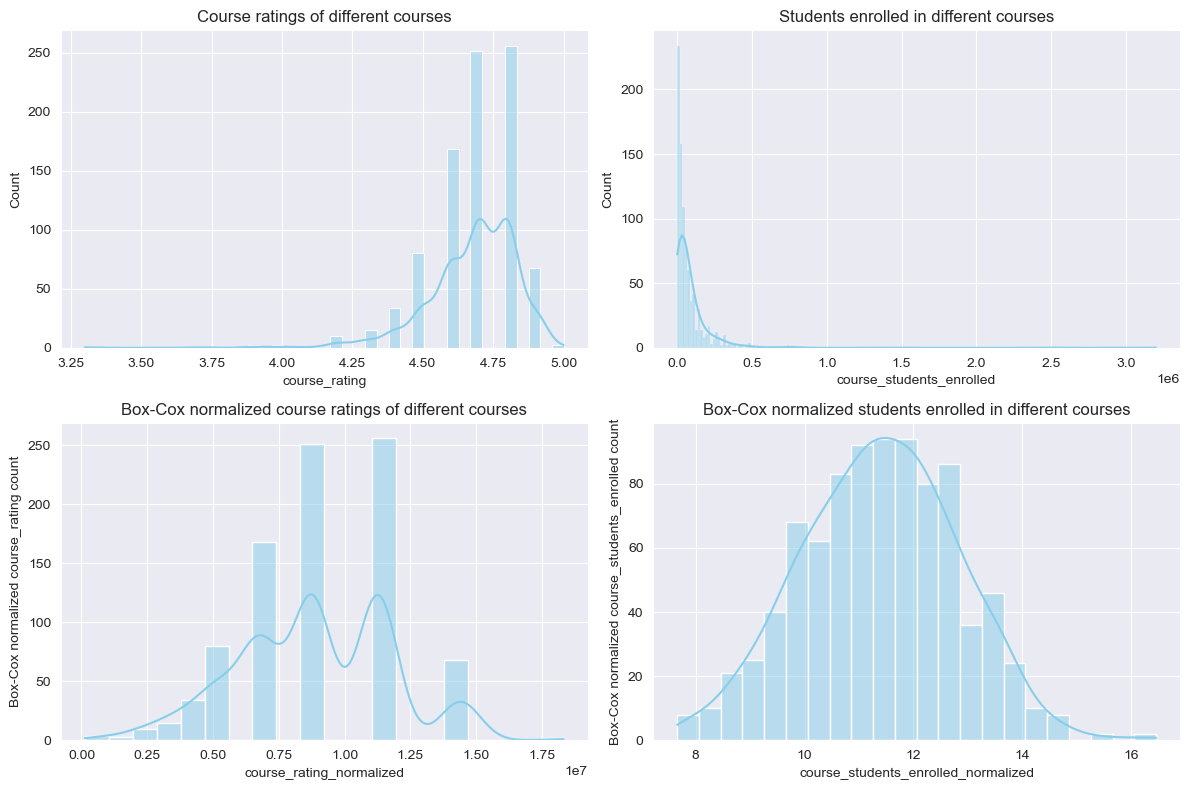

In [53]:
# Comparing normalized data with non-scaled data
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(
    data=df, x="course_rating", ax=ax[0, 0], kde=True, color="skyblue"
)
sns.histplot(
    data=df,
    x="course_students_enrolled",
    ax=ax[0, 1],
    kde=True,
    color="skyblue",
)
sns.histplot(
    data=normalized_data_course_rating,
    x="transformed_count",
    ax=ax[1, 0],
    kde=True,
    color="skyblue",
)
sns.histplot(
    data=normalized_data_course_students_enrolled,
    x="transformed_count",
    ax=ax[1, 1],
    kde=True,
    color="skyblue",
)
# Setting titles
ax[0, 0].set_title("Course ratings of different courses")
ax[0, 1].set_title("Students enrolled in different courses")
ax[1, 0].set_title(
    "Box-Cox normalized course ratings of different courses"
)
ax[1, 1].set_title(
    "Box-Cox normalized students enrolled in different courses"
)

# Setting y axes
ax[0, 0].set_ylabel("Count")
ax[0, 1].set_ylabel("Count")
ax[1, 0].set_ylabel("Box-Cox normalized course_rating count")
ax[1, 1].set_ylabel(
    "Box-Cox normalized course_students_enrolled count"
)

# Setting x axes
ax[0, 0].set_xlabel("course_rating")
ax[0, 1].set_xlabel("course_students_enrolled")
ax[1, 0].set_xlabel("course_rating_normalized")
ax[1, 1].set_xlabel("course_students_enrolled_normalized")
plt.tight_layout()
plt.show()

In [54]:
# Shapiro test results for course_rating
stat, p_value = shapiro(course_rating_data)
print(f"Shapiro test results: Statistic: {stat}, p-value: {p_value}")

Shapiro test results: Statistic: 0.8527798056602478, p-value: 5.249823583409654e-28


In [55]:
# Shapiro test results for course_students_enrolled
stat, p_value = shapiro(students_enrolled_data)
print(f"Shapiro test results: Statistic: {stat}, p-value: {p_value}")

Shapiro test results: Statistic: 0.38536012172698975, p-value: 0.0


In [56]:
# Anderson test results for course_rating
result = stats.anderson(course_rating_data)

print(f"Statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Level: {result.significance_level}")

Statistic: 31.680212703602137
Critical Values: [0.573 0.653 0.784 0.914 1.087]
Significance Level: [15.  10.   5.   2.5  1. ]


In [57]:
# Anderson test results for course_students_enrolled
result = stats.anderson(students_enrolled_data)

print(f"Statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Level: {result.significance_level}")

Statistic: 129.09164058328997
Critical Values: [0.573 0.653 0.784 0.914 1.087]
Significance Level: [15.  10.   5.   2.5  1. ]


### Feature correlation
After checking course_students_enrolled and course_rating correlation, it can be said that these features are not correlated, that means that having more or less students, does not seem to impact course rating. This assumption was made because corr function correlated coefficient is 0.071 which <0.1 (commonly taken as value for non-correlation). This function calculated Pearson coefficient. So to validate conclusion Spearman coefficient was also calculated. Spearman coefficient confirmed the conclusion with a low coefficient value of 0.03.

In [58]:
# Calculation of correlation matrix and unstacking it
numeric_columns = df.select_dtypes(include="number")
correlation_matrix = numeric_columns.corr().round(3)
correlated_pairs = correlation_matrix.unstack()
correlated_pairs.course_rating

course_rating               1.000
course_students_enrolled    0.071
dtype: float64

In [59]:
# Calculating correlation according to Spearman
correlation, p_value = spearmanr(
    df.course_students_enrolled, df.course_rating
)
print(f"Correlation is {correlation}, p-value is {p_value}")

Correlation is 0.026831305499584096, p-value is 0.4237548075634262


## Exploration of the dataset
&#9758; Amount of Unique values in course_title feature: 888.
&#9758; Amount of Unique values in course_organization feature: 154.
&#9758; Amount of Unique values in course_Certificate_type feature: 3.
&#9758; Amount of Unique values in course_difficulty feature: 4.
&#9758; Amount of Unique values in language feature: 22.
&#9758; Amount of Unique values in course_title_clean feature: 891.
&#9758; Amount of Unique values in course_org_clean feature: 154.

In [60]:
categorical_columns = df.select_dtypes(include="object").columns

for column in categorical_columns:
    unique_values = df[column].unique()
    unique_values_count = len(unique_values)
    print(
        f"Amount of Unique values in {column} feature: "
        f"{unique_values_count}."
    )

Amount of Unique values in course_title feature: 888.
Amount of Unique values in course_organization feature: 154.
Amount of Unique values in course_Certificate_type feature: 3.
Amount of Unique values in course_difficulty feature: 4.
Amount of Unique values in language feature: 22.
Amount of Unique values in course_title_clean feature: 891.
Amount of Unique values in course_org_clean feature: 154.


### Bi-variate analysis

<font color='green'>Which course has the highest rating? the lowest?</font>
Two courses have the highest rating of 5.0:
- infectious disease modelling (401)
- the_lawyer_of_the_future_legaltech_and_the_dig... (789)

One course that has the worst rating of 3.3:
- how_to_create_a_website_in_a_weekend_project_c... (767)

<font color='green'>Which organization course has the highest rating? the lowest?</font>
Two organizations have highest-rated courses with rating of 5.0:
- imperial_college_london
- universidad_austral

Two organization that has the worst rated course with rating of 3.3:
- the_state_university_of_new_york

In [61]:
# Finding highest-rated course
highest_rated_course = df.loc[
    df.course_rating == df.course_rating.max()
]
highest_rated_course

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language,contains_punctuation_title,contains_punctuation_org,course_title_clean,course_org_clean,duplicated_course_titles
401,infectious disease modelling,imperial college london,specialization,5.0,intermediate,1600,en,False,False,infectious_disease_modelling,imperial_college_london,False
789,el abogado del futuro: legaltech y la transfor...,universidad austral,course,5.0,beginner,1500,es,True,False,the_lawyer_of_the_future_legaltech_and_the_dig...,universidad_austral,False


In [62]:
# Finding worst-rated course
highest_rated_course = df.loc[
    df.course_rating == df.course_rating.min()
]
highest_rated_course

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language,contains_punctuation_title,contains_punctuation_org,course_title_clean,course_org_clean,duplicated_course_titles
767,how to create a website in a weekend! (project...,the state university of new york,course,3.3,mixed,140000,en,True,False,how_to_create_a_website_in_a_weekend_project_c...,the_state_university_of_new_york,False


<font color='green'>Which organization has the most courses in the dataset? the least courses?</font>

Most courses in the dataset are provided by these organizations:
- university_of_pennsylvania (59)
- university_of_michigan (41)
- google_cloud (34)
- duke_university (28)
- johns_hopkins_university (28)

Count of organizations that have 1 one course is: 49.

In [63]:
# Highest amount of courses having organizations
course_count = (
    df[["course_title_clean", "course_org_clean"]]
    .groupby("course_org_clean")
    .count()
)
org_with_most_courses = course_count["course_title_clean"].nlargest(5)
org_with_most_courses

course_org_clean
university_of_pennsylvania    59
university_of_michigan        41
google_cloud                  34
duke_university               28
johns_hopkins_university      28
Name: course_title_clean, dtype: int64

In [64]:
# Highest amount of courses having organizations
org_with_least_courses = course_count["course_title_clean"].nsmallest(
    5
)
org_with_least_courses

course_org_clean
american_institute_of_business_and_economics    1
automation_anywhere                             1
bcg                                             1
birkbeck_university_of_london                   1
bloomsbury_learning_exchange                    1
Name: course_title_clean, dtype: int64

In [65]:
# Checking, how many organizations have only one course
org_with_one_course = course_count[
    course_count["course_title_clean"] == 1
]
print(
    f"Count of organizations that have only one course is: "
    f"{org_with_one_course.shape[0]}."
)

Count of organizations that have only one course is: 49.


<font color='green'> Which courses has the most enrolled students? the least enrolled students? </font>

Courses that have the most students enrolled:

| index | course_title_clean                                    |   course_students_enrolled |
|------:|:------------------------------------------------------|---------------------------:|
|     6 | machine_learning_stanford                             |                    3200000 |
|     2 | the_science_of_well_being                             |                    2500000 |
|     3 | python_for_everybody                                  |                    1500000 |
|    47 | programming_for_everybody_getting_started_with_python |                    1300000 |
|    13 | data_science                                          |                     830000 |

Courses that have the least students enrolled:

| index | course_title_clean                                                       |   course_students_enrolled |
|------:|:-------------------------------------------------------------------------|---------------------------:|
|   373 | healthcare_law                                                           |                       1700 |
|   826 | the_pronunciation_of_american_english                                    |                       1700 |
|   462 | blockchain_revolution_in_financial_services                              |                       1600 |
|   401 | infectious_disease_modelling                                             |                       1600 |
|   789 | the_lawyer_of_the_future_legaltech_and_the_digital_transformation_of_law |                       1500 |   

In [66]:
# Courses with the highest amount of students enrolled
df_sorted_students = df.sort_values(
    by="course_students_enrolled", ascending=False
)
print(
    df_sorted_students[
        ["course_title_clean", "course_students_enrolled"]
    ]
    .head()
    .to_markdown()
)

|    | course_title_clean                                    |   course_students_enrolled |
|---:|:------------------------------------------------------|---------------------------:|
|  6 | machine_learning_stanford                             |                    3200000 |
|  2 | the_science_of_well_being                             |                    2500000 |
|  3 | python_for_everybody                                  |                    1500000 |
| 47 | programming_for_everybody_getting_started_with_python |                    1300000 |
| 13 | data_science                                          |                     830000 |


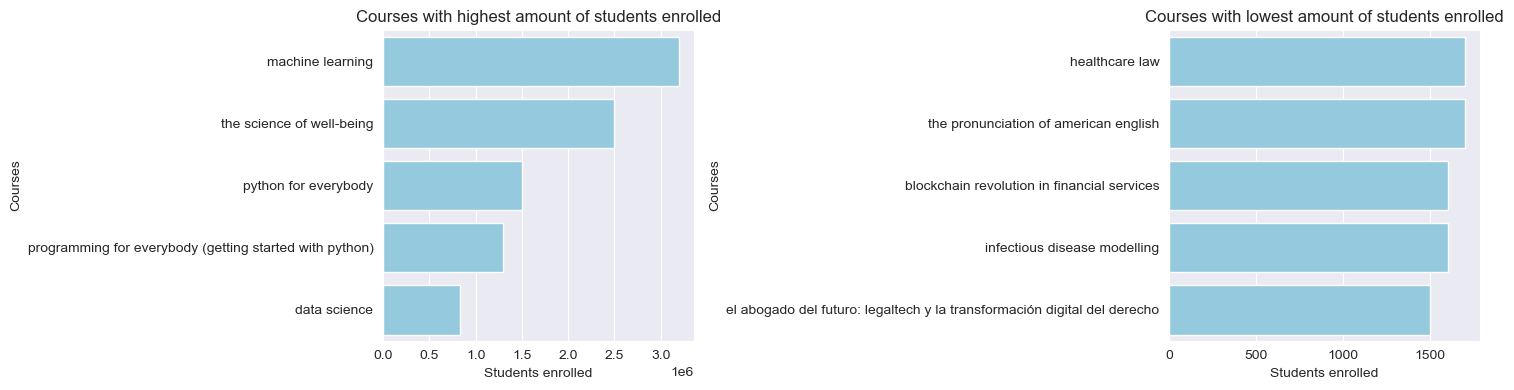

In [67]:
# Courses with the highest amount of students enrolled plotted
ig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(
    data=df_sorted_students.head(),
    x="course_students_enrolled",
    y="course_title",
    color="skyblue",
    ax=ax[0],
)

sns.barplot(
    data=df_sorted_students.tail(),
    x="course_students_enrolled",
    y="course_title",
    color="skyblue",
    ax=ax[1],
)

ax[0].set_title("Courses with highest amount of students enrolled")
ax[1].set_title("Courses with lowest amount of students enrolled")
ax[0].set_xlabel("Students enrolled")
ax[1].set_xlabel("Students enrolled")
ax[0].set_ylabel("Courses")
ax[1].set_ylabel("Courses")

plt.tight_layout()
plt.show()

In [68]:
# Courses with the lowest amount of students enrolled
print(
    df_sorted_students[
        ["course_title_clean", "course_students_enrolled"]
    ]
    .tail()
    .to_markdown()
);

|     | course_title_clean                                                       |   course_students_enrolled |
|----:|:-------------------------------------------------------------------------|---------------------------:|
| 373 | healthcare_law                                                           |                       1700 |
| 826 | the_pronunciation_of_american_english                                    |                       1700 |
| 462 | blockchain_revolution_in_financial_services                              |                       1600 |
| 401 | infectious_disease_modelling                                             |                       1600 |
| 789 | the_lawyer_of_the_future_legaltech_and_the_digital_transformation_of_law |                       1500 |


<font color='green'>Which organization has the most enrolled students? the least enrolled students?</font>
Organizations that have the most students enrolled in their courses:
- university_of_michigan, 7437700
- university_of_pennsylvania, 5501300
- stanford_university, 4854000
- university_of_california_irvine, 4326000
- johns_hopkins_university, 4298900

Organizations that have the least students enrolled in their courses:
- automation_anywhere, 2200
- peter_the_great_st_petersburg_polytechnic_university, 2400
- university_of_new_mexico, 5500
- escp_business_school, 6500
- ucl_school_of_management, 7800

In [69]:
# Organizations that have the most students enrolled int their courses
student_org_count = (
    df[["course_org_clean", "course_students_enrolled"]]
    .groupby("course_org_clean")
    .sum()
    .sort_values(by=["course_students_enrolled"], ascending=False)
)

org_with_most_students = student_org_count[
    "course_students_enrolled"
].nlargest(5)
org_with_most_students

course_org_clean
university_of_michigan             7437700
university_of_pennsylvania         5501300
stanford_university                4854000
university_of_california_irvine    4326000
johns_hopkins_university           4298900
Name: course_students_enrolled, dtype: int64

In [70]:
# Organizations that have the least students enrolled int their courses
org_with_least_students = student_org_count[
    "course_students_enrolled"
].nsmallest(5)
org_with_least_students

course_org_clean
automation_anywhere                                     2200
peter_the_great_st_petersburg_polytechnic_university    2400
university_of_new_mexico                                5500
escp_business_school                                    6500
ucl_school_of_management                                7800
Name: course_students_enrolled, dtype: int64

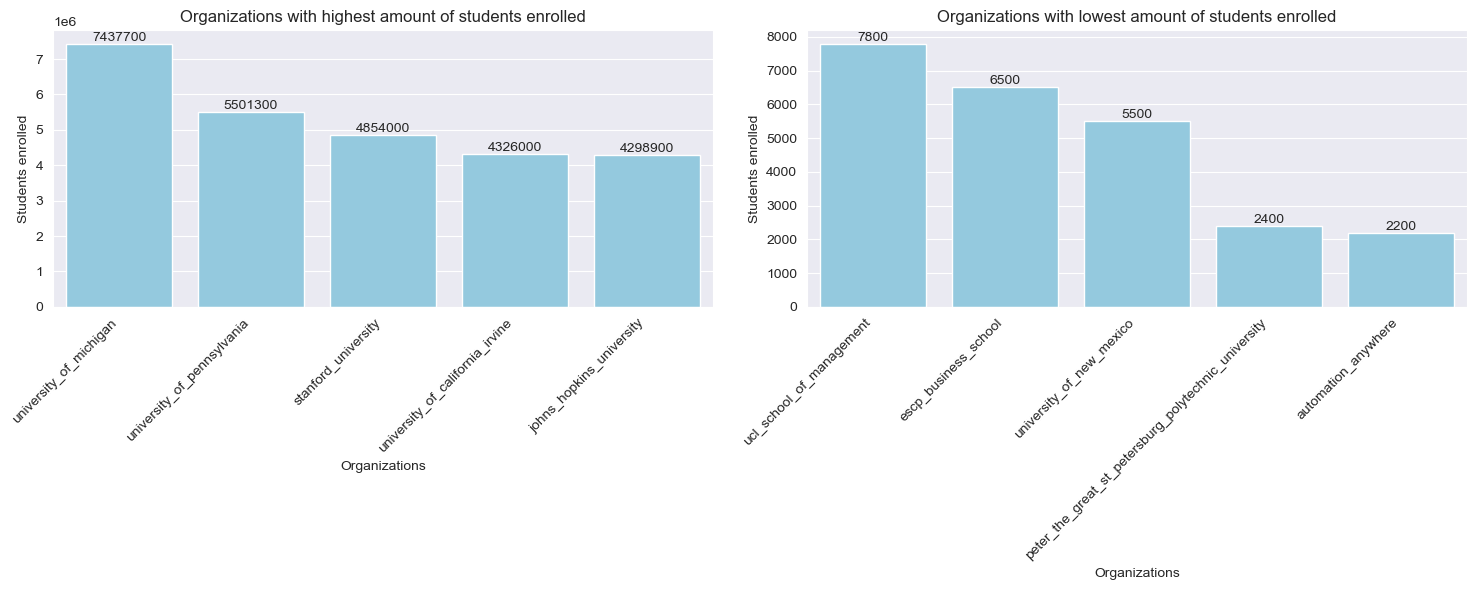

In [71]:
# Courses with the highest amount of students enrolled plotted
ig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(
    data=student_org_count.head(),
    x="course_org_clean",
    y="course_students_enrolled",
    color="skyblue",
    ax=ax[0],
)

sns.barplot(
    data=student_org_count.tail(),
    x="course_org_clean",
    y="course_students_enrolled",
    color="skyblue",
    ax=ax[1],
)

ax[0].set_title(
    "Organizations with highest amount of students enrolled"
)
ax[1].set_title(
    "Organizations with lowest amount of students enrolled"
)
ax[0].set_xlabel("Organizations")
ax[1].set_xlabel("Organizations")
ax[0].set_ylabel("Students enrolled")
ax[1].set_ylabel("Students enrolled")

# Adding labels to have more informative graphs
for i, v in enumerate(
    student_org_count.head()["course_students_enrolled"]
):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(
    student_org_count.tail()["course_students_enrolled"]
):
    ax[1].text(i, v, str(v), ha="center", va="bottom")

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(
    ax[0].get_xticklabels(), rotation=45, ha="right"
)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(
    ax[1].get_xticklabels(), rotation=45, ha="right"
)

plt.tight_layout()
plt.show()

<font color='green'>Which course difficulty has the most enrolled students? least average enrolled students?</font>
- Mixed courses on average have the most students: 133633
- Advanced courses on average have the least students: 66547
- Beginner courses has the overall highest amount of students: 39921800
- Advanced courses has the overall lowest amount of students: 1264400

In [72]:
# Course difficulty and average students enrolled
student_course_difficulty = round(
    df[["course_difficulty", "course_students_enrolled"]]
    .groupby("course_difficulty")
    .mean(),
    0,
)

student_course_difficulty.sort_values(
    by="course_students_enrolled", ascending=False
)

,course_students_enrolled
course_difficulty,
mixed,133633.0
beginner,81975.0
intermediate,73264.0
advanced,66547.0


In [73]:
# Course difficulty and sum students enrolled
student_course_difficulty_sum = round(
    df[["course_difficulty", "course_students_enrolled"]]
    .groupby("course_difficulty")
    .sum(),
    0,
)
student_course_difficulty_sum.sort_values(
    by="course_students_enrolled", ascending=False
)

,course_students_enrolled
course_difficulty,
beginner,39921800
mixed,24989400
intermediate,14506300
advanced,1264400


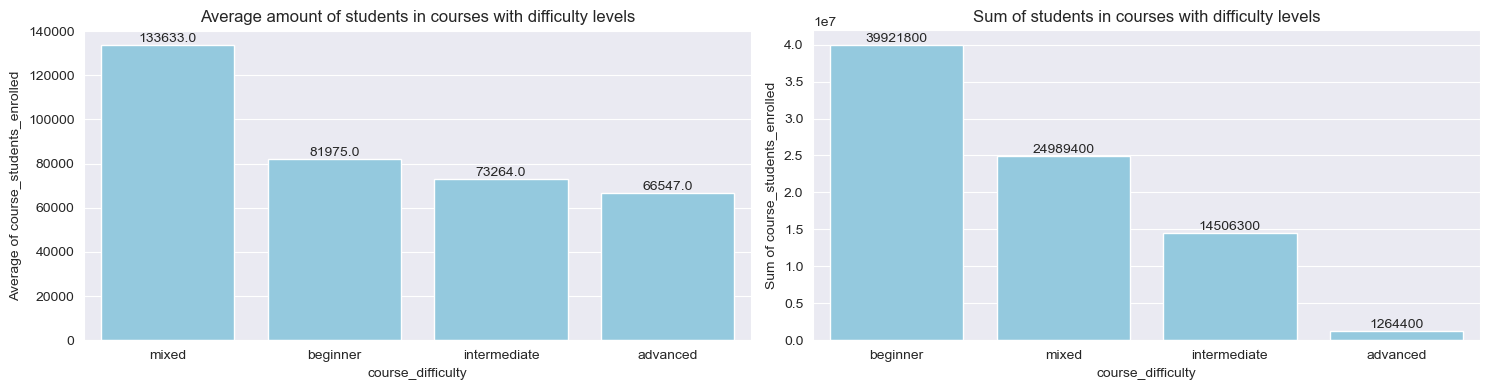

In [74]:
# Course difficulty and students enrolled: mean and sum comparison

# Sorting dataframes for better looking barplots
df_sorted_scd = student_course_difficulty.sort_values(
    by="course_students_enrolled", ascending=False
)
df_sorted_scds = student_course_difficulty_sum.sort_values(
    by="course_students_enrolled", ascending=False
)

# Setting up the barplot parameters
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(
    data=df_sorted_scd,
    ax=ax[0],
    color="skyblue",
    x="course_difficulty",
    y="course_students_enrolled",
)
sns.barplot(
    data=df_sorted_scds,
    ax=ax[1],
    color="skyblue",
    x="course_difficulty",
    y="course_students_enrolled",
)

# Setting axes and titles for barplots
ax[0].set_title(
    "Average amount of students in courses with difficulty levels"
)
ax[1].set_title("Sum of students in courses with difficulty levels")
ax[0].set_xlabel("course_difficulty")
ax[1].set_xlabel("course_difficulty")
ax[0].set_ylabel("Average of course_students_enrolled")
ax[1].set_ylabel("Sum of course_students_enrolled")

# Adding labels to have more informative graphs
for i, v in enumerate(df_sorted_scd["course_students_enrolled"]):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(df_sorted_scds["course_students_enrolled"]):
    ax[1].text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()

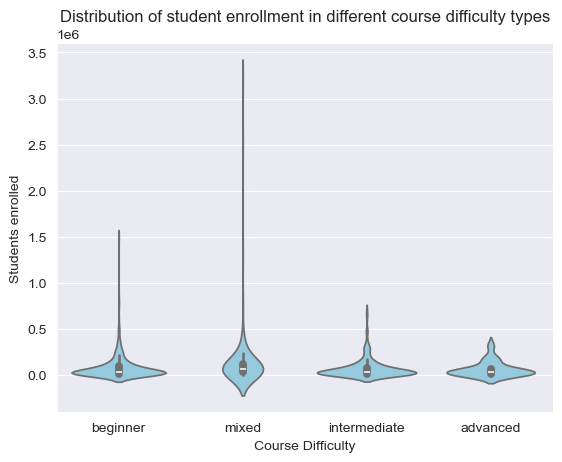

In [75]:
# Plotting student enrollment distribution of different difficulty courses
sns.violinplot(
    data=df,
    x="course_difficulty",
    y="course_students_enrolled",
    color="skyblue",
)

plt.title(
    "Distribution of student enrollment in different course difficulty types"
)
plt.xlabel("Course Difficulty")
plt.ylabel("Students enrolled")
plt.show()

<font color='green'>Which course difficulty has the best rating? the worst rating?</font>
- Best rated courses according to average are beginner and mixed, with average 4.7.
- Worst rated courses according to average are advanced and intermediate, with average 4.6.
- Best rated courses according to mode are mixed, with rating mode 4.8.
- Worst rated courses according to mode are advanced, with rating mode 4.5.

In [76]:
# Course difficulty and course rating analysis: mean
difficulty_course_rating_avg = round(
    df[["course_difficulty", "course_rating"]]
    .groupby("course_difficulty")
    .mean(),
    1,
)

df_sorted_dcr_mean = difficulty_course_rating_avg.sort_values(
    by="course_rating", ascending=False
)
df_sorted_dcr_mean

,course_rating
course_difficulty,
beginner,4.7
mixed,4.7
advanced,4.6
intermediate,4.6


In [77]:
# Course difficulty and course rating analysis: median
difficulty_course_rating_median = (
    df[["course_difficulty", "course_rating"]]
    .groupby("course_difficulty")
    .median()
)

df_sorted_dcr_median = difficulty_course_rating_median.sort_values(
    by="course_rating", ascending=False
)
df_sorted_dcr_median

,course_rating
course_difficulty,
mixed,4.8
advanced,4.7
beginner,4.7
intermediate,4.7


In [78]:
# Course difficulty and course rating analysis: mode
difficulty_course_rating_mode = (
    df[["course_difficulty", "course_rating"]]
    .groupby("course_difficulty")
    .agg(lambda x: x.mode().iloc[0])
)

df_sorted_dcr_mode = difficulty_course_rating_mode.sort_values(
    by="course_rating", ascending=False
)
df_sorted_dcr_mode

,course_rating
course_difficulty,
mixed,4.8
beginner,4.7
intermediate,4.7
advanced,4.5


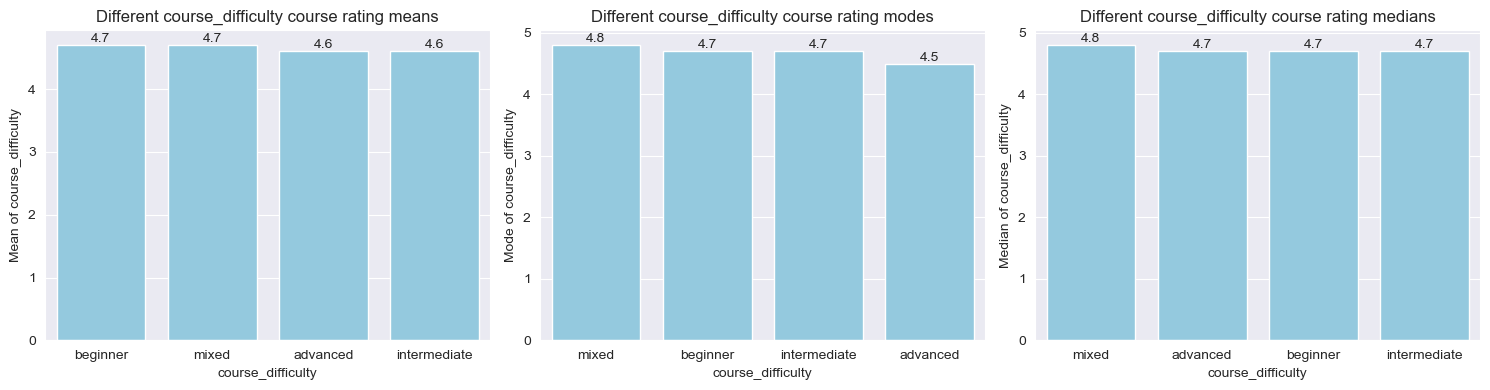

In [79]:
# Course difficulty and rating: mean, mode and median comparison

# Setting up the scatterplot parameters
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(
    df_sorted_dcr_mean,
    ax=ax[0],
    color="skyblue",
    x="course_difficulty",
    y="course_rating",
)
sns.barplot(
    data=df_sorted_dcr_mode,
    ax=ax[1],
    color="skyblue",
    x="course_difficulty",
    y="course_rating",
)
sns.barplot(
    data=df_sorted_dcr_median,
    ax=ax[2],
    color="skyblue",
    x="course_difficulty",
    y="course_rating",
)

# Setting axes and titles for barplots
ax[0].set_title("Different course_difficulty course rating means")
ax[1].set_title("Different course_difficulty course rating modes")
ax[2].set_title("Different course_difficulty course rating medians")
ax[0].set_xlabel("course_difficulty")
ax[1].set_xlabel("course_difficulty")
ax[2].set_xlabel("course_difficulty")
ax[0].set_ylabel("Mean of course_difficulty")
ax[1].set_ylabel("Mode of course_difficulty")
ax[2].set_ylabel("Median of course_difficulty")

# Adding labels to have more informative graphs
for i, v in enumerate(df_sorted_dcr_mean["course_rating"]):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(df_sorted_dcr_mode["course_rating"]):
    ax[1].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(df_sorted_dcr_median["course_rating"]):
    ax[2].text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()

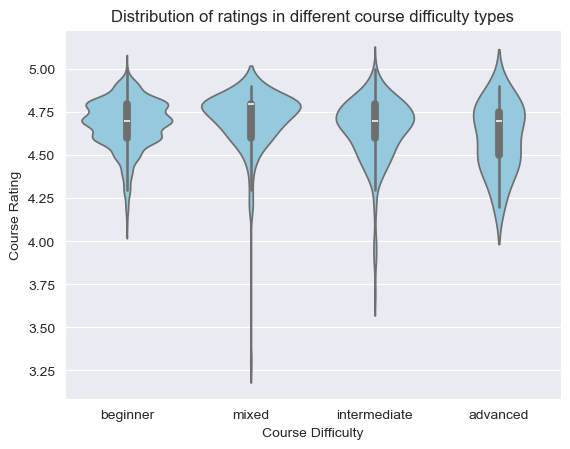

In [80]:
# Plotting rating distribution of different difficulty courses
sns.violinplot(
    data=df, x="course_difficulty", y="course_rating", color="skyblue"
)

plt.title(
    "Distribution of ratings in different course difficulty types"
)
plt.xlabel("Course Difficulty")
plt.ylabel("Course Rating")
plt.show()

<font color='green'>Which certificate type has the most enrolled students? least enrolled students?</font>
- Highest average of enrolled students is for professional_certificate, with average students enrolled: 190700.
- Lowest average of enrolled students is for course, with average students enrolled: 87854.
- Highest sum of enrolled students is for course, with sum of students enrolled: 51131300.
- Lowest sum of enrolled students is for professional_certificate, with sum of students enrolled: 2288400.

In [81]:
# Certificate type and enrolled student: mean
certificate_students_avg = round(
    df[["course_Certificate_type", "course_students_enrolled"]]
    .groupby("course_Certificate_type")
    .mean(),
    0,
)

df_sorted_cf_mean = certificate_students_avg.sort_values(
    by="course_students_enrolled", ascending=False
)
df_sorted_cf_mean

,course_students_enrolled
course_Certificate_type,
professional_certificate,190700.0
specialization,91792.0
course,87854.0


In [82]:
# Certificate type and enrolled student: sum
certificate_students_sum = (
    df[["course_Certificate_type", "course_students_enrolled"]]
    .groupby("course_Certificate_type")
    .sum()
)

df_sorted_cf_sum = certificate_students_sum.sort_values(
    by="course_students_enrolled", ascending=False
)
df_sorted_cf_sum

,course_students_enrolled
course_Certificate_type,
course,51131300
specialization,27262200
professional_certificate,2288400


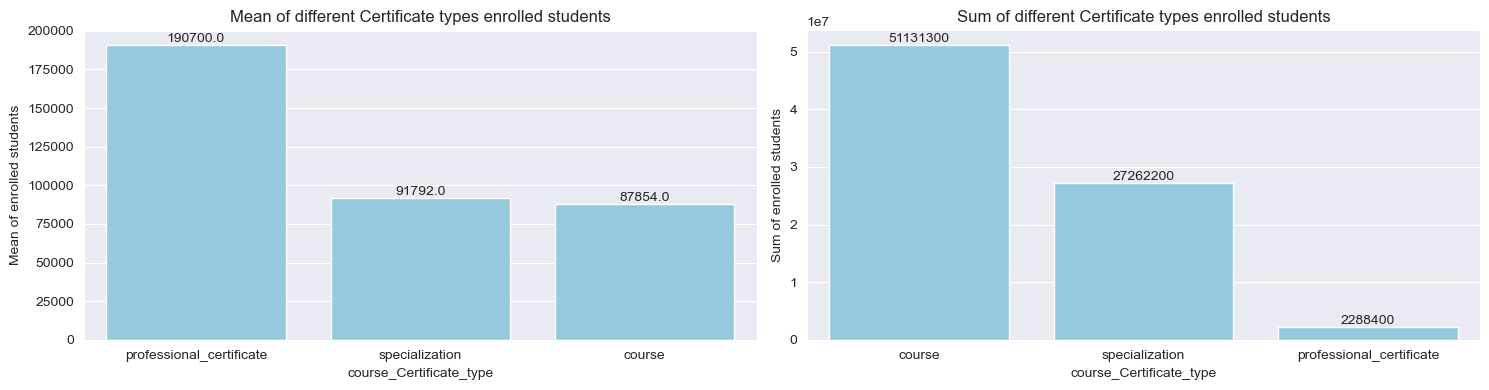

In [83]:
# Course difficulty and rating: mean, mode and median comparison

# Setting up the barplot parameters
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(
    data=df_sorted_cf_mean,
    ax=ax[0],
    color="skyblue",
    x="course_Certificate_type",
    y="course_students_enrolled",
)
sns.barplot(
    data=df_sorted_cf_sum,
    ax=ax[1],
    color="skyblue",
    x="course_Certificate_type",
    y="course_students_enrolled",
)

# Setting axes and titles for barplots
ax[0].set_title(
    "Mean of different Certificate types enrolled students"
)
ax[1].set_title(
    "Sum of different Certificate types enrolled students"
)
ax[0].set_xlabel("course_Certificate_type")
ax[1].set_xlabel("course_Certificate_type")
ax[0].set_ylabel("Mean of enrolled students")
ax[1].set_ylabel("Sum of enrolled students")

# Adding labels to have more informative graphs
for i, v in enumerate(df_sorted_cf_mean["course_students_enrolled"]):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(df_sorted_cf_sum["course_students_enrolled"]):
    ax[1].text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()

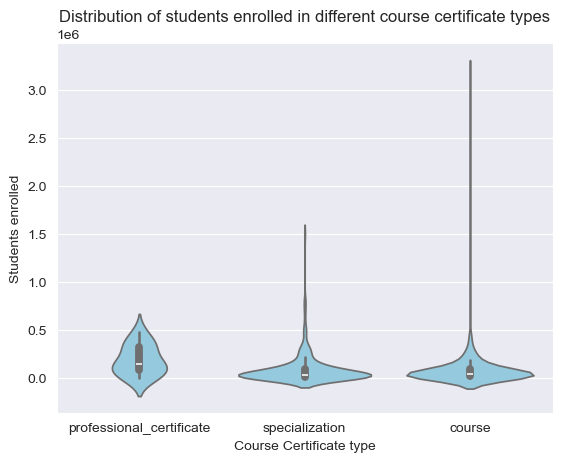

In [84]:
# Plotting student enrollment distribution of different course certificate types
sns.violinplot(
    data=df,
    x="course_Certificate_type",
    y="course_students_enrolled",
    color="skyblue",
)

plt.title(
    "Distribution of students enrolled in different course certificate types"
)
plt.xlabel("Course Certificate type")
plt.ylabel("Students enrolled")
plt.show()

<font color='green'>Which certificate type has the best rating? worst rating?</font>
- Certificate type that has the highest mean of ratings is course, with mean value of 4.7.
- Certificate type that has the lowest mean of ratings is specialization, with mean value of 4.6.
- Certificate type that has the highest mode of ratings is course, with mode value of 4.8.
- Certificate type that has the lowest mode of ratings is professional_certificate, with mode value of 4.6.

In [85]:
# Course certificate type and course rating analysis: mean
certificate_rating_avg = round(
    df[["course_Certificate_type", "course_rating"]]
    .groupby("course_Certificate_type")
    .mean(),
    1,
)

df_sorted_cr_mean = certificate_rating_avg.sort_values(
    by="course_rating", ascending=False
)
df_sorted_cr_mean

,course_rating
course_Certificate_type,
course,4.7
professional_certificate,4.7
specialization,4.6


In [86]:
# Course certificate type and course rating analysis: mode
certificate_rating_mode = (
    df[["course_Certificate_type", "course_rating"]]
    .groupby("course_Certificate_type")
    .agg(lambda x: x.mode().iloc[0])
)

df_sorted_cr_mode = certificate_rating_mode.sort_values(
    by="course_rating", ascending=False
)
df_sorted_cr_mode

,course_rating
course_Certificate_type,
course,4.8
specialization,4.7
professional_certificate,4.6


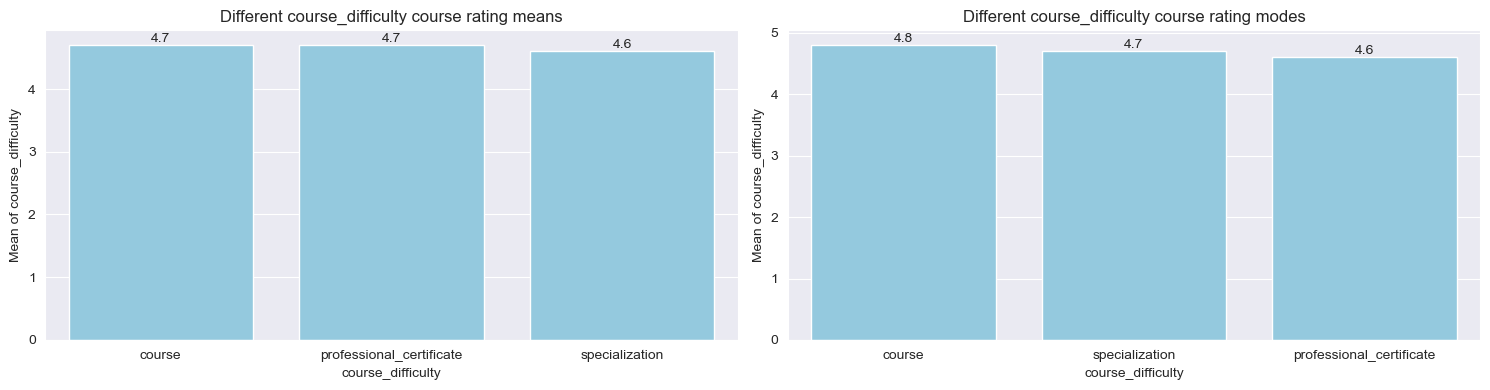

In [87]:
# Course difficulty and rating: mean, mode and median comparison

# Setting up the scatterplot parameters
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(
    data=df_sorted_cr_mean,
    ax=ax[0],
    color="skyblue",
    x="course_Certificate_type",
    y="course_rating",
)
sns.barplot(
    data=df_sorted_cr_mode,
    ax=ax[1],
    color="skyblue",
    x="course_Certificate_type",
    y="course_rating",
)

# Setting axes and titles for barplots
ax[0].set_title("Different course_difficulty course rating means")
ax[1].set_title("Different course_difficulty course rating modes")
ax[0].set_xlabel("course_difficulty")
ax[1].set_xlabel("course_difficulty")
ax[0].set_ylabel("Mean of course_difficulty")
ax[1].set_ylabel("Mean of course_difficulty")

# Adding labels to have more informative graphs
for i, v in enumerate(df_sorted_cr_mean["course_rating"]):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(df_sorted_cr_mode["course_rating"]):
    ax[1].text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()

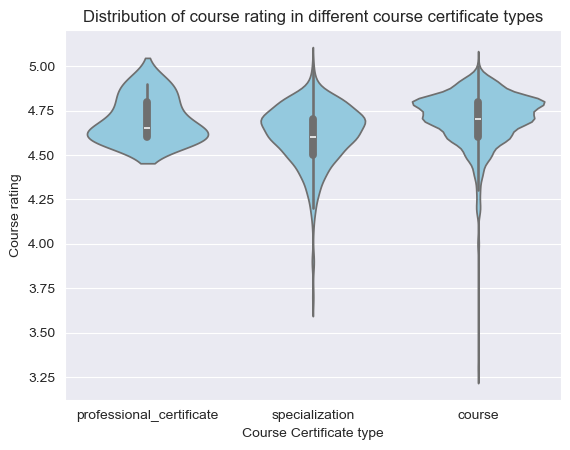

In [88]:
# Plotting rating distribution of different course certificate types
sns.violinplot(
    data=df,
    x="course_Certificate_type",
    y="course_rating",
    color="skyblue",
)

plt.title(
    "Distribution of course rating in different course certificate types"
)
plt.xlabel("Course Certificate type")
plt.ylabel("Course rating")
plt.show()

### Multivariate analysis

<font color='green'>Which organization has the most beginner courses? Which organization has the least?</font>
- The most beginner courses (all course_Certificate_type) are found in university_of_pennsylvania. It is 28.
- The least beginner courses (all course_Certificate_type) are found in 47 organizations. It is 1.

In [89]:
# Beginner courses analysis: organization with the most beginner courses
beginner_courses = df.loc[df.course_difficulty == "beginner"]

beginner_courses_count = (
    beginner_courses[["course_org_clean", "course_title_clean"]]
    .groupby("course_org_clean")
    .count()
)
beginner_courses_count["course_title_clean"].nlargest(1)

course_org_clean
university_of_pennsylvania    28
Name: course_title_clean, dtype: int64

In [90]:
# Beginner courses analysis: organization with the least beginner courses
beginner_courses_count["course_title_clean"].nsmallest(1)

course_org_clean
atlassian    1
Name: course_title_clean, dtype: int64

In [91]:
df_least_courses = beginner_courses_count.loc[
    beginner_courses_count.course_title_clean == 1
]
print(
    f"The least beginner courses (all course_Certificate_type) are found in "
    f"{df_least_courses.shape[0]} organizations. It is 1."
)

The least beginner courses (all course_Certificate_type) are found in 47 organizations. It is 1.


<font color='green'>Highest rated and most enrolled course? What about the lowest and least enrolled?</font>
- Highest rated course is machine_learning_stanford, from stanford_university. It has 3200000 enrolled students and rating of 4.9.
- Lowest rated course is the_lawyer_of_the_future_legaltech_and_the_digital_transformation_of_law, from universidad_austral. It has 1500 enrolled students and rating of 5.0.

In [92]:
# Identifying the highest rated and most enrolled course
best_course_row_index = (
    df["course_rating"] + df["course_students_enrolled"]
).idxmax()
best_course = df.loc[best_course_row_index]
best_course

course_title                           machine learning
course_organization                 stanford university
course_Certificate_type                          course
course_rating                                       4.9
course_difficulty                                 mixed
course_students_enrolled                        3200000
language                                             fr
contains_punctuation_title                        False
contains_punctuation_org                          False
course_title_clean            machine_learning_stanford
course_org_clean                    stanford_university
duplicated_course_titles                           True
Name: 6, dtype: object

In [93]:
# Identifying the lowest rated and least enrolled course
worst_course_row_index = (
    df["course_rating"] + df["course_students_enrolled"]
).idxmin()
worst_course = df.loc[worst_course_row_index]
worst_course

course_title                  el abogado del futuro: legaltech y la transfor...
course_organization                                         universidad austral
course_Certificate_type                                                  course
course_rating                                                               5.0
course_difficulty                                                      beginner
course_students_enrolled                                                   1500
language                                                                     es
contains_punctuation_title                                                 True
contains_punctuation_org                                                  False
course_title_clean            the_lawyer_of_the_future_legaltech_and_the_dig...
course_org_clean                                            universidad_austral
duplicated_course_titles                                                  False
Name: 789, dtype: object

<font color='green'>Highest rated and least enrolled course?</font>
Highest rated and least enrolled course is the_lawyer_of_the_future_legaltech_and_the_digital_transformation_of_law with student enrollment of 1500 and course rating of 5.0.

In [94]:
# Identifying the highest rated and least enrolled course
df_highest_rated_lowest_enrolled = df.sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, True],
)
df_highest_rated_lowest_enrolled[
    [
        "course_title_clean",
        "course_org_clean",
        "course_rating",
        "course_students_enrolled",
    ]
].head(1)

,course_title_clean,course_org_clean,course_rating,course_students_enrolled
789,the_lawyer_of_the_future_legaltech_and_the_dig...,universidad_austral,5.0,1500


<font color='green'>Lowest rated and most enrolled course?</font>
Lowest rated and most enrolled course is how_to_create_a_website_in_a_weekend_project_centered_course with student enrollment of 140000 and course rating of 3.3.

In [95]:
# Identifying the lowest rated and most enrolled course
df_lowest_rated_highest_enrolled = df.sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[True, False],
)
df_lowest_rated_highest_enrolled[
    [
        "course_title_clean",
        "course_org_clean",
        "course_rating",
        "course_students_enrolled",
    ]
].head(1)

,course_title_clean,course_org_clean,course_rating,course_students_enrolled
767,how_to_create_a_website_in_a_weekend_project_c...,the_state_university_of_new_york,3.3,140000


<font color='green'>Highest rated and most enrolled courses in university_of_pennsylvania?</font>
Highest rated and most enrolled courses are:

|     | course_title_clean                           |   course_rating |   course_students_enrolled |
|----:|:---------------------------------------------|----------------:|---------------------------:|
| 481 | more_introduction_to_financial_accounting    |             4.9 |                      40000 |
| 576 | the_oral_cavity_portal_to_health_and_disease |             4.9 |                       9400 |
| 773 | effective_compliance_programs                |             4.9 |                       3400 |
| 175 | english_for_career_development               |             4.8 |                     760000 |
| 287 | greek_and_roman_mythology                    |             4.8 |                     260000 |

In [96]:
# The highest rated and enrolled courses in university_of_pennsylvania
df_pennsylvania_best = df.loc[
    df.course_org_clean == "university_of_pennsylvania"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

df_pennsylvania_table = (
    df_pennsylvania_best[
        [
            "course_title_clean",
            "course_rating",
            "course_students_enrolled",
        ]
    ]
    .head()
    .to_markdown()
)
print(df_pennsylvania_table)

|     | course_title_clean                           |   course_rating |   course_students_enrolled |
|----:|:---------------------------------------------|----------------:|---------------------------:|
| 481 | more_introduction_to_financial_accounting    |             4.9 |                      40000 |
| 576 | the_oral_cavity_portal_to_health_and_disease |             4.9 |                       9400 |
| 773 | effective_compliance_programs                |             4.9 |                       3400 |
| 175 | english_for_career_development               |             4.8 |                     760000 |
| 287 | greek_and_roman_mythology                    |             4.8 |                     260000 |


<font color='green'>Lowest rated and lowest enrolled courses in university_of_pennsylvania?</font>
Lowest rated and lowest enrolled courses in university_of_pennsylvania are these:

|     | course_title_clean                          |   course_rating |   course_students_enrolled |
|----:|:--------------------------------------------|----------------:|---------------------------:|
| 339 | introduction_to_spreadsheets_and_models     |             4.2 |                      76000 |
| 315 | robotics                                    |             4.4 |                     120000 |
| 396 | financial_acumen_for_non_financial_managers |             4.5 |                      10000 |
| 558 | managing_social_and_human_capital           |             4.5 |                      27000 |
| 604 | accounting_analytics                        |             4.5 |                      80000 |

In [97]:
# The lowest rated and most enrolled courses in university_of_pennsylvania
df_pennsylvania_worst = df.loc[
    df.course_org_clean == "university_of_pennsylvania"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[True, True],
)

df_pennsylvania_table = (
    df_pennsylvania_worst[
        [
            "course_title_clean",
            "course_rating",
            "course_students_enrolled",
        ]
    ]
    .head()
    .to_markdown()
)
print(df_pennsylvania_table)

|     | course_title_clean                          |   course_rating |   course_students_enrolled |
|----:|:--------------------------------------------|----------------:|---------------------------:|
| 339 | introduction_to_spreadsheets_and_models     |             4.2 |                      76000 |
| 315 | robotics                                    |             4.4 |                     120000 |
| 396 | financial_acumen_for_non_financial_managers |             4.5 |                      10000 |
| 558 | managing_social_and_human_capital           |             4.5 |                      27000 |
| 604 | accounting_analytics                        |             4.5 |                      80000 |


<font color='green'>Top 5 courses in university_of_michigan with the highest ratings and the highest enrollment?</font>
Top 5 courses in university_of_michigan with the highest ratings and the highest enrollment are:

|     | course_title_clean                                     |   course_rating |   course_students_enrolled |
|----:|:-------------------------------------------------------|----------------:|---------------------------:|
| 111 | python_data_structures                                 |             4.9 |                     420000 |
|   3 | python_for_everybody                                   |             4.8 |                    1500000 |
|  47 | programming_for_everybody_getting_started_with_python  |             4.8 |                    1300000 |
|  40 | successful_negotiation_essential_strategies_and_skills |             4.8 |                     750000 |
| 199 | using_python_to_access_web_data                        |             4.8 |                     310000 |

In [98]:
# The highest rated and most enrolled courses in university_of_michigan
df_michigan_best = df.loc[
    df.course_org_clean == "university_of_michigan"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

df_michigan_table = (
    df_michigan_best[
        [
            "course_title_clean",
            "course_rating",
            "course_students_enrolled",
        ]
    ]
    .head()
    .to_markdown()
)
print(df_michigan_table)

|     | course_title_clean                                     |   course_rating |   course_students_enrolled |
|----:|:-------------------------------------------------------|----------------:|---------------------------:|
| 111 | python_data_structures                                 |             4.9 |                     420000 |
|   3 | python_for_everybody                                   |             4.8 |                    1500000 |
|  47 | programming_for_everybody_getting_started_with_python  |             4.8 |                    1300000 |
|  40 | successful_negotiation_essential_strategies_and_skills |             4.8 |                     750000 |
| 199 | using_python_to_access_web_data                        |             4.8 |                     310000 |


<font color='green'>5 courses in university_of_michigan with the lowest ratings and the lowest enrollment?</font>
5 courses in university_of_michigan with the lowest ratings and the lowest enrollment are:

|     | course_title_clean                                                                      |   course_rating |   course_students_enrolled |
|----:|:----------------------------------------------------------------------------------------|----------------:|---------------------------:|
| 187 | introduction_to_data_science_in_python                                                  |             4.5 |                     390000 |
|  26 | applied_data_science_with_python                                                        |             4.5 |                     480000 |
| 456 | beyond_the_sustainable_development_goals_sdgs_addressing_sustainability_and_development |             4.6 |                       2300 |
| 355 | good_with_words_writing_and_editing                                                     |             4.6 |                       3800 |
| 837 | instructional_methods_in_health_professions_education                                   |             4.6 |                       9700 |


In [99]:
# The lowest rated and least enrolled courses in university_of_michigan
df_michigan_worst = df.loc[
    df.course_org_clean == "university_of_michigan"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[True, True],
)

df_michigan_table = (
    df_michigan_worst[
        [
            "course_title_clean",
            "course_rating",
            "course_students_enrolled",
        ]
    ]
    .head()
    .to_markdown()
)
print(df_michigan_table)

|     | course_title_clean                                                                      |   course_rating |   course_students_enrolled |
|----:|:----------------------------------------------------------------------------------------|----------------:|---------------------------:|
| 187 | introduction_to_data_science_in_python                                                  |             4.5 |                     390000 |
|  26 | applied_data_science_with_python                                                        |             4.5 |                     480000 |
| 456 | beyond_the_sustainable_development_goals_sdgs_addressing_sustainability_and_development |             4.6 |                       2300 |
| 355 | good_with_words_writing_and_editing                                                     |             4.6 |                       3800 |
| 837 | instructional_methods_in_health_professions_education                                   |             4.6 |               

<font color='green'>Organisation automation_anywhere average course rating?</font>
Since organisation automation_anywhere has the lowest amount of students enrolled, it was interesting to check how the course rating average looks like. However, organisation has only one course. Therefore, average can not be calculated.

In [100]:
df_automation_anywhere = df.loc[
    df.course_org_clean == "automation_anywhere"
]
df_automation_anywhere[
    [
        "course_title_clean",
        "course_rating",
        "course_students_enrolled",
    ]
]

,course_title_clean,course_rating,course_students_enrolled
640,implementing_rpa_with_cognitive_automation_and...,4.6,2200


<font color='green'>Top 5 highest rated and most enrolled coursed for each difficulty and for each certificate type.</font>

In [101]:
# Resting the index for dataframe for plotting
df_reset = df.reset_index()
df_reset.head()

,index,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language,contains_punctuation_title,contains_punctuation_org,course_title_clean,course_org_clean,duplicated_course_titles
0,0,ibm data science,ibm,professional_certificate,4.6,beginner,480000,en,False,False,ibm_data_science,ibm,False
1,1,introduction to data science,ibm,specialization,4.6,beginner,310000,en,False,False,introduction_to_data_science,ibm,False
2,2,the science of well-being,yale university,course,4.9,mixed,2500000,en,True,False,the_science_of_well_being,yale_university,False
3,3,python for everybody,university of michigan,specialization,4.8,beginner,1500000,en,False,False,python_for_everybody,university_of_michigan,False
4,4,google it support,google,professional_certificate,4.8,beginner,350000,en,False,False,google_it_support,google,False


In [102]:
# Best beginner courses
top_beginner = df_reset.loc[
    df_reset.course_difficulty == "beginner"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

# Best mixed courses
top_mixed = df_reset.loc[
    df_reset.course_difficulty == "mixed"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

# Best intermediate courses
top_intermediate = df_reset.loc[
    df_reset.course_difficulty == "intermediate"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

# Best advanced courses
top_advanced = df_reset.loc[
    df_reset.course_difficulty == "advanced"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

# Best courses type courses
top_courses = df_reset.loc[
    df_reset.course_Certificate_type == "course"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

# Best specialization type courses
top_specialization = df_reset.loc[
    df_reset.course_Certificate_type == "specialization"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

# Best specialization type courses
top_prof_certificate = df_reset.loc[
    df_reset.course_Certificate_type == "professional_certificate"
].sort_values(
    by=["course_rating", "course_students_enrolled"],
    ascending=[False, False],
)

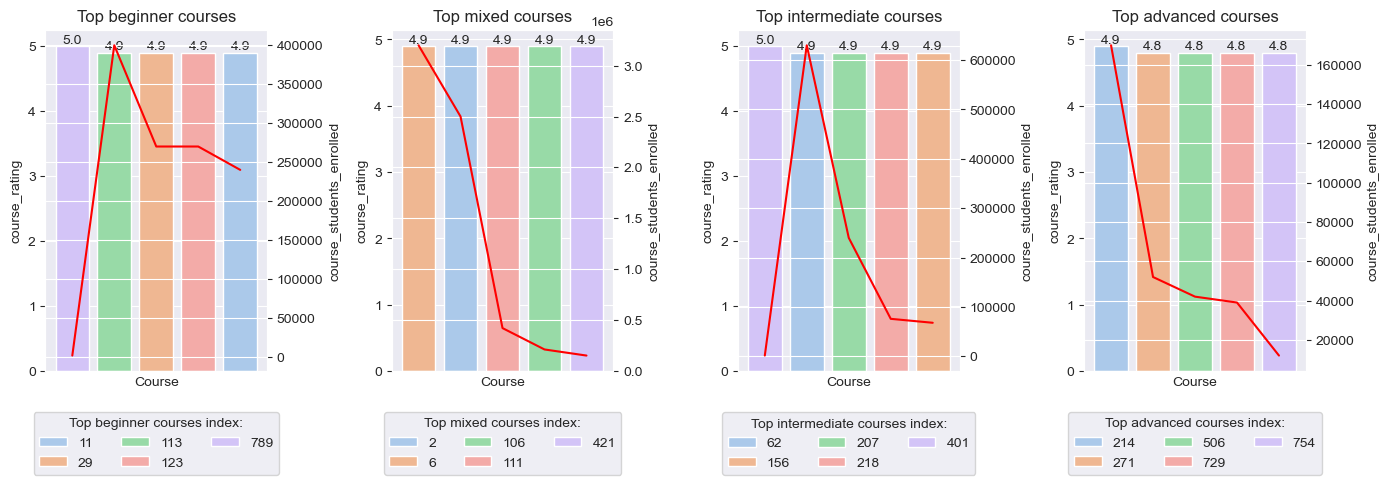

In [103]:
# Top courses according to difficulty levels
# Setting up the subplot parameters
fig, ax = plt.subplots(1, 4, figsize=(14, 5))

sns.barplot(
    data=top_beginner.head(),
    ax=ax[0],
    color="skyblue",
    x="course_title_clean",
    y="course_rating",
    hue="index",
    palette="pastel",
)
ax1 = ax[0].twinx()
sns.lineplot(
    data=top_beginner.head(),
    ax=ax1,
    color="red",
    x="course_title_clean",
    y="course_students_enrolled",
)

sns.barplot(
    data=top_mixed.head(),
    ax=ax[1],
    color="skyblue",
    x="course_title_clean",
    y="course_rating",
    hue="index",
    palette="pastel",
)
ax2 = ax[1].twinx()
sns.lineplot(
    data=top_mixed.head(),
    ax=ax2,
    color="red",
    x="course_title_clean",
    y="course_students_enrolled",
)

sns.barplot(
    data=top_intermediate.head(),
    ax=ax[2],
    color="skyblue",
    x="course_title_clean",
    y="course_rating",
    hue="index",
    palette="pastel",
)
ax3 = ax[2].twinx()
sns.lineplot(
    data=top_intermediate.head(),
    ax=ax3,
    color="red",
    x="course_title_clean",
    y="course_students_enrolled",
)

sns.barplot(
    data=top_advanced.head(),
    ax=ax[3],
    color="skyblue",
    x="course_title_clean",
    y="course_rating",
    hue="index",
    palette="pastel",
)
ax4 = ax[3].twinx()
sns.lineplot(
    data=top_advanced.head(),
    ax=ax4,
    color="red",
    x="course_title_clean",
    y="course_students_enrolled",
)

# Setting axes and titles
ax[0].set_title("Top beginner courses")
ax[1].set_title("Top mixed courses")
ax[2].set_title("Top intermediate courses")
ax[3].set_title("Top advanced courses")

ax[0].set_xlabel("Course")
ax[1].set_xlabel("Course")
ax[2].set_xlabel("Course")
ax[3].set_xlabel("Course")

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])

ax[0].legend(
    title="Top beginner courses index:",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
)
ax[1].legend(
    title="Top mixed courses index:",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
)
ax[2].legend(
    title="Top intermediate courses index:",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
)
ax[3].legend(
    title="Top advanced courses index:",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
)

# Adding labels to have more informative graphs
for i, v in enumerate(top_beginner.course_rating.head()):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(top_mixed.course_rating.head()):
    ax[1].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(top_intermediate.course_rating.head()):
    ax[2].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(top_advanced.course_rating.head()):
    ax[3].text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()

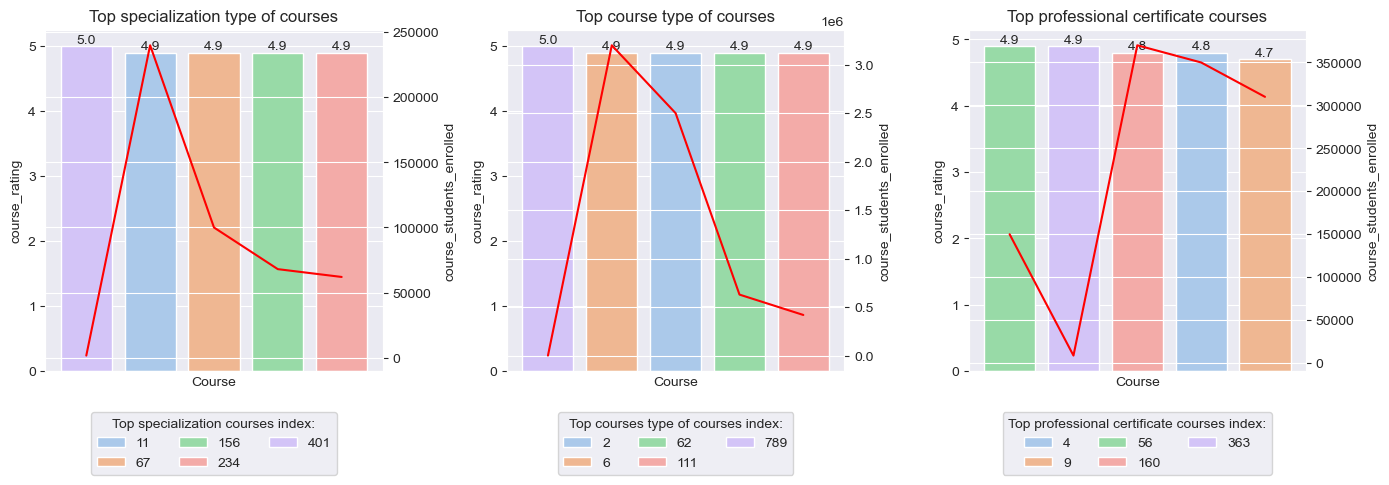

In [104]:
# Top courses according to course type
# Setting up the subplot parameters
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

sns.barplot(
    data=top_specialization.head(),
    ax=ax[0],
    color="skyblue",
    x="course_title_clean",
    y="course_rating",
    hue="index",
    palette="pastel",
)
ax5 = ax[0].twinx()
sns.lineplot(
    data=top_specialization.head(),
    ax=ax5,
    color="red",
    x="course_title_clean",
    y="course_students_enrolled",
)

sns.barplot(
    data=top_courses.head(),
    ax=ax[1],
    color="skyblue",
    x="course_title_clean",
    y="course_rating",
    hue="index",
    palette="pastel",
)
ax6 = ax[1].twinx()
sns.lineplot(
    data=top_courses.head(),
    ax=ax6,
    color="red",
    x="course_title_clean",
    y="course_students_enrolled",
)

sns.barplot(
    data=top_prof_certificate.head(),
    ax=ax[2],
    color="skyblue",
    x="course_title_clean",
    y="course_rating",
    hue="index",
    palette="pastel",
)
ax7 = ax[2].twinx()
sns.lineplot(
    data=top_prof_certificate.head(),
    ax=ax7,
    color="red",
    x="course_title_clean",
    y="course_students_enrolled",
)

# Setting axes and titles
ax[0].set_title("Top specialization type of courses")
ax[1].set_title("Top course type of courses")
ax[2].set_title("Top professional certificate courses")

ax[0].set_xlabel("Course")
ax[1].set_xlabel("Course")
ax[2].set_xlabel("Course")

ax5.set_xticks([])
ax6.set_xticks([])
ax7.set_xticks([])

ax[0].legend(
    title="Top specialization courses index:",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
)
ax[1].legend(
    title="Top courses type of courses index:",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
)
ax[2].legend(
    title="Top professional certificate courses index:",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
)

# Adding labels to have more informative graphs
for i, v in enumerate(top_specialization.course_rating.head()):
    ax[0].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(top_courses.course_rating.head()):
    ax[1].text(i, v, str(v), ha="center", va="bottom")
for i, v in enumerate(top_prof_certificate.course_rating.head()):
    ax[2].text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()